In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [ ]:
#Mounting gDrive in Colaboratory
try:
    from google.colab import drive
    drive.mount("/content/drive/", force_remount=True)
    google_drive_prefix = "/content/drive/My Drive"
    data_prefix = "{}/mnist/".format(google_drive_prefix)
except ModuleNotFoundError: 
    data_prefix = "data/"

Mounted at /content/drive/


# Hypothesis
With the data from the fictional data set created by IBM data scientists, we will investigate the hypothesis "*What are the main variables affecting employee attrition?*"

This question is especially interesting since companies want employees to stay at the company, so that the company can grow and because losing employees means a high cost for the company. By investigating the affecting variables the company can gain insight in the patterns that can lead to employees quitting.

To answer the hypothesis we will follow these steps:
* Exploratory analysis: initial investigation of data in order to get to know the data.
* Data Wrangling: remove outliers, null values, fix mislabeled classes, remove duplicates.
* Feature engineering / Data processing: manipulate data so that we can produce meaningful information.
* Use three different machine learning algorithms to investigate the hypothesis.

In [ ]:
# read csv and print first 10 rows
wa_df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv", sep=',')
wa_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


## Exploratory analysis

**Investigate the dataset**

*   Investigate data types
*   Investigate dimensions (rows and columns)
*   Investigate null values
*   Investigate outliers



In [ ]:
# Investigate data types
wa_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
wa_df.shape

(1470, 35)

In [ ]:
# Investigate Null values
# Checks if dataframe has any null values
print(f'Contains null values: {wa_df.isnull().values.any()}\n')

# Display null values per column
print(wa_df.isnull().sum()) 

Contains null values: False

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurr

In [ ]:
# Investigate outliers
from datetime import datetime,timedelta
Q1 = wa_df.quantile(0.25)
Q3 = wa_df.quantile(0.75)
IQR = Q3 - Q1
# Print the outliers
wa_outliers = ((wa_df[wa_df.columns ]< (Q1 - 1.5 * IQR)) | (wa_df[wa_df.columns] > (Q3 + 1.5 * IQR))).sum()
print(f'AMOUNT OF OUTLIERS\n{wa_outliers[wa_outliers != 0]}')

AMOUNT OF OUTLIERS
MonthlyIncome              114
NumCompaniesWorked          52
PerformanceRating          226
StockOptionLevel            85
TotalWorkingYears           63
TrainingTimesLastYear      238
YearsAtCompany             104
YearsInCurrentRole          21
YearsSinceLastPromotion    107
YearsWithCurrManager        14
dtype: int64


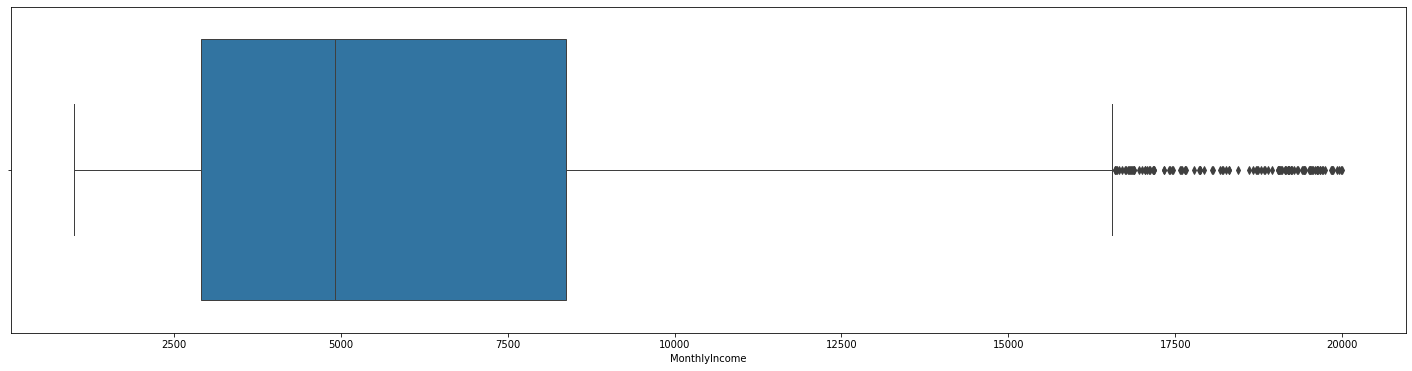

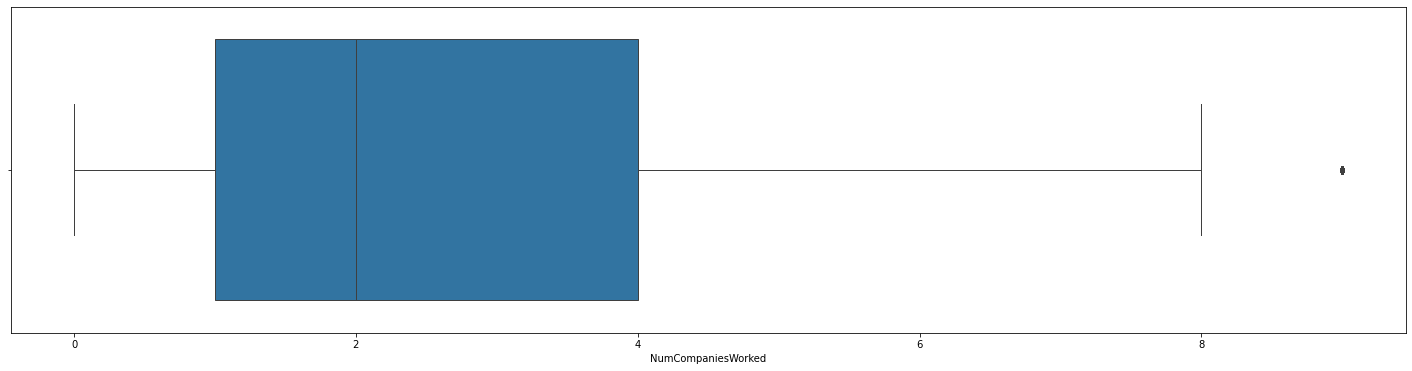

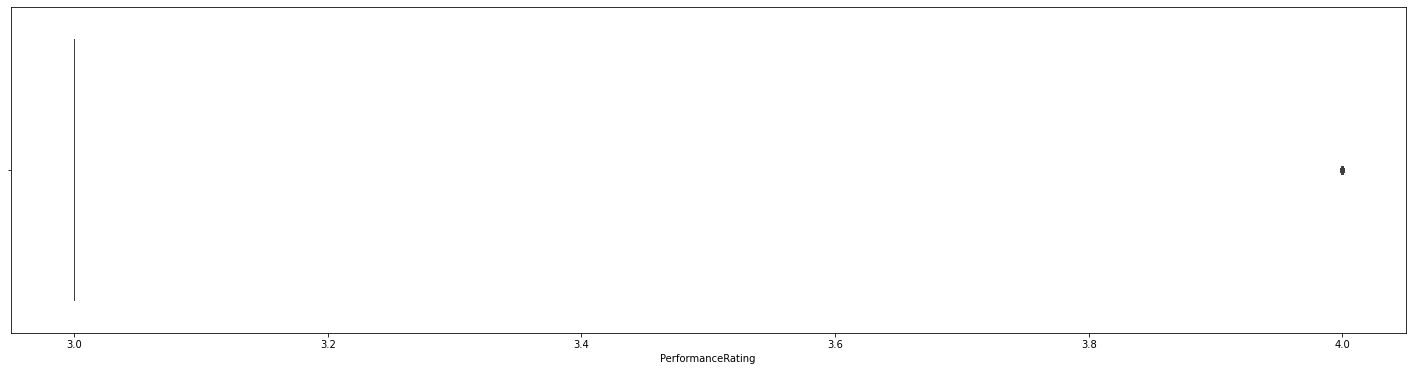

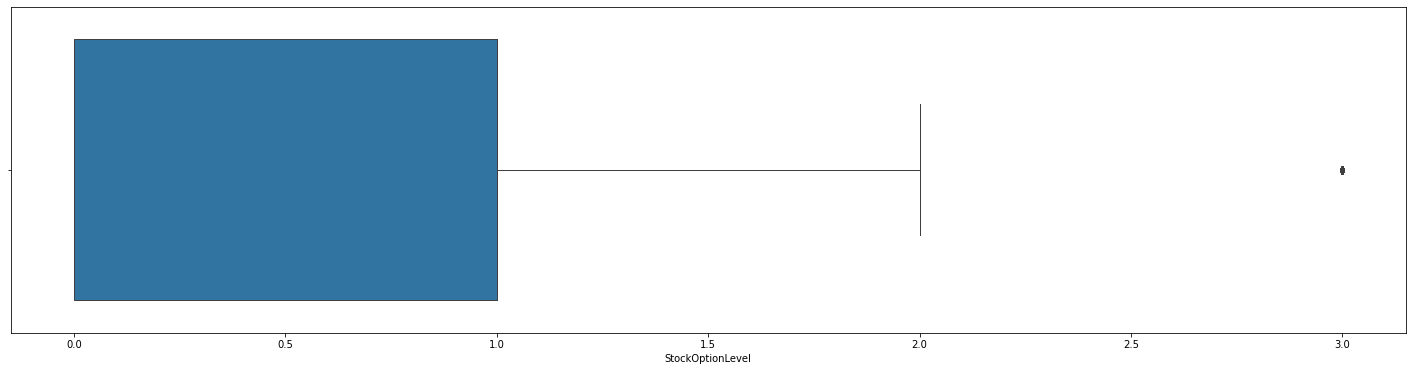

In [ ]:
# Function for plotting outliers
def plot_outlier(feature):
  plt.figure(figsize=(25, 6))
  ax = sns.boxplot(x=wa_df[feature], linewidth=1)

# Plot outliers
plot_outlier('MonthlyIncome')
plot_outlier('NumCompaniesWorked')
plot_outlier('PerformanceRating')
plot_outlier('StockOptionLevel')

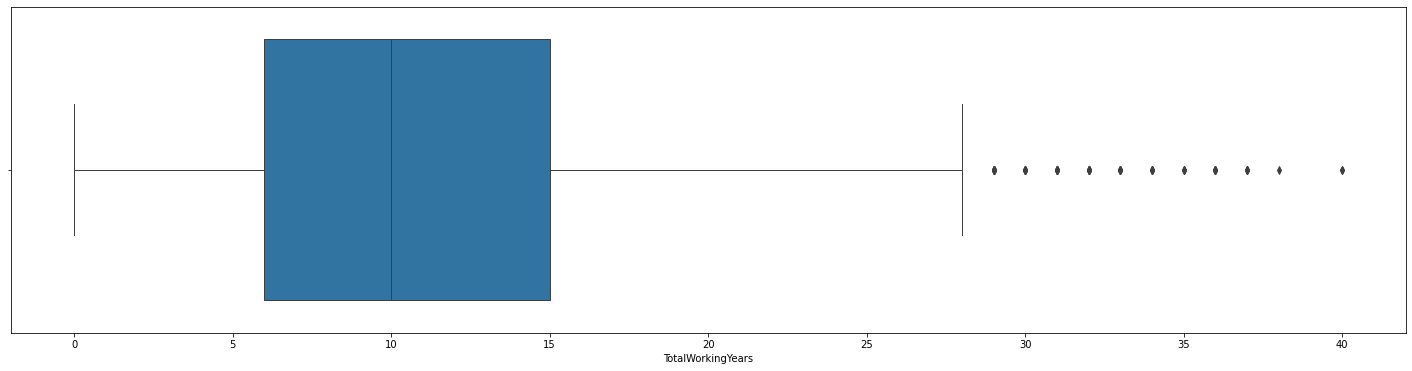

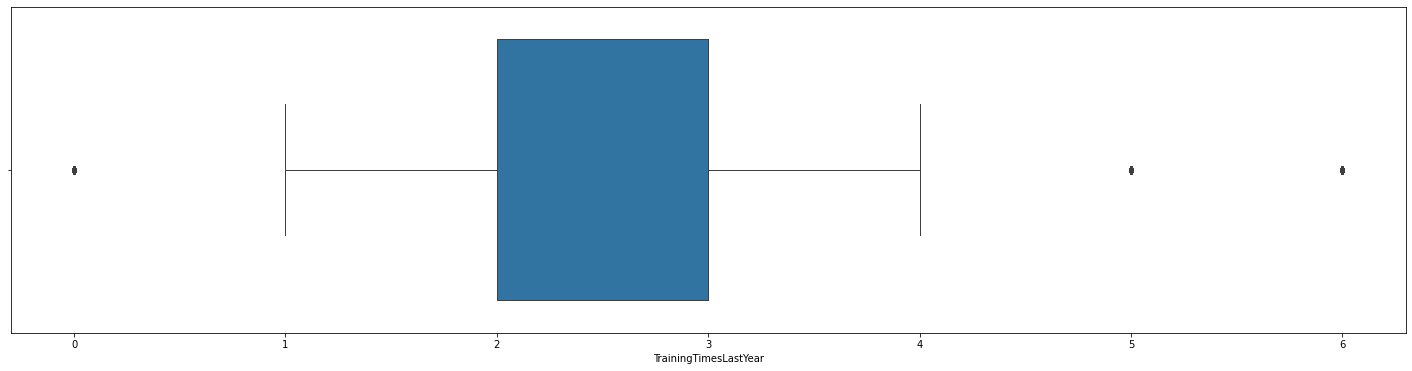

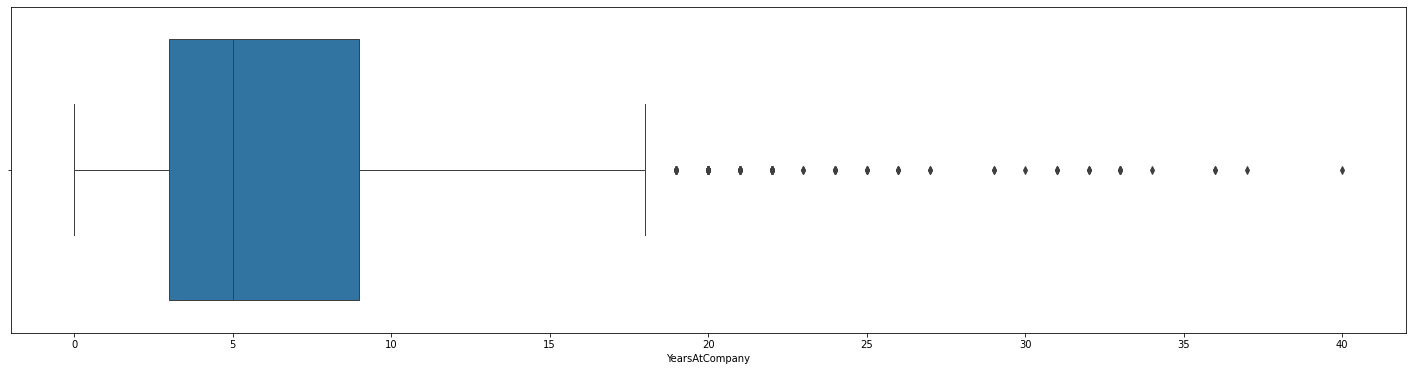

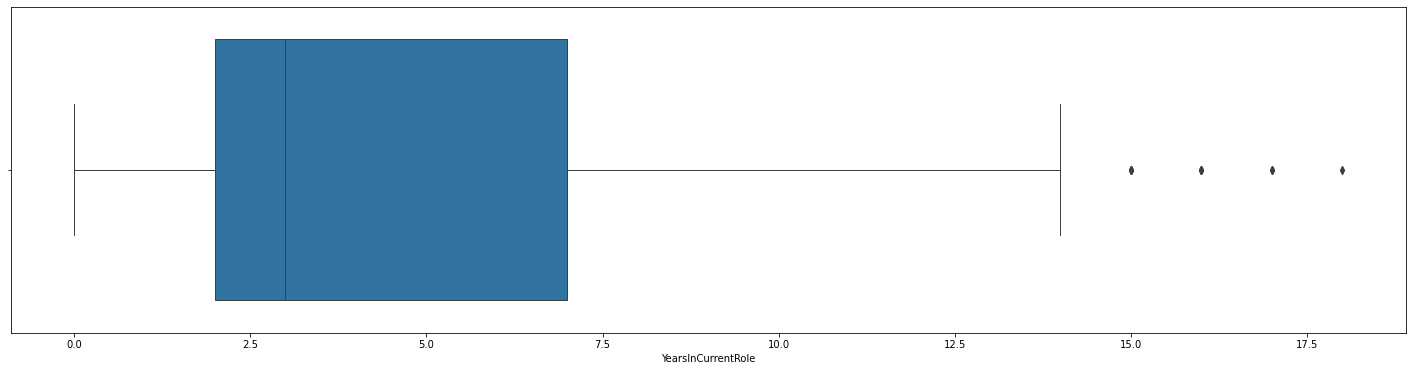

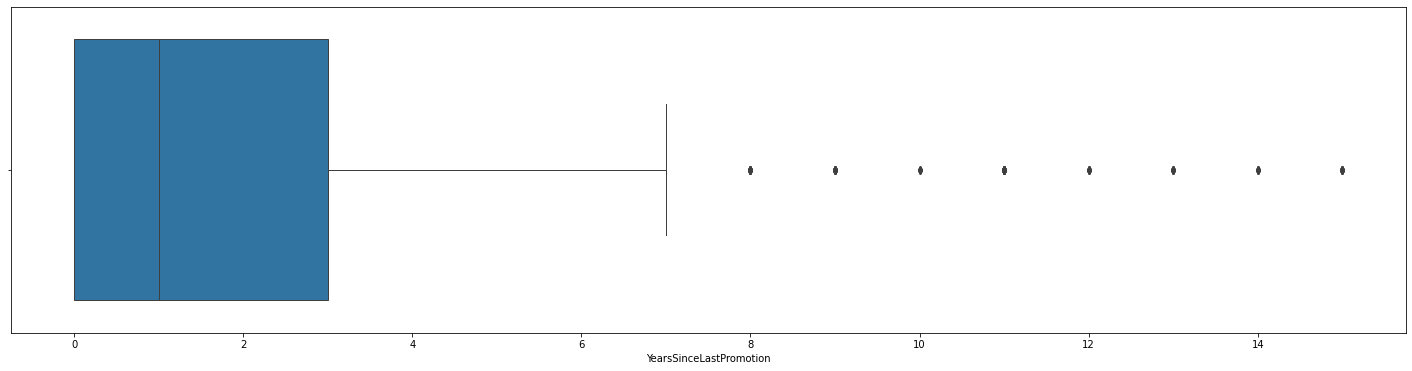

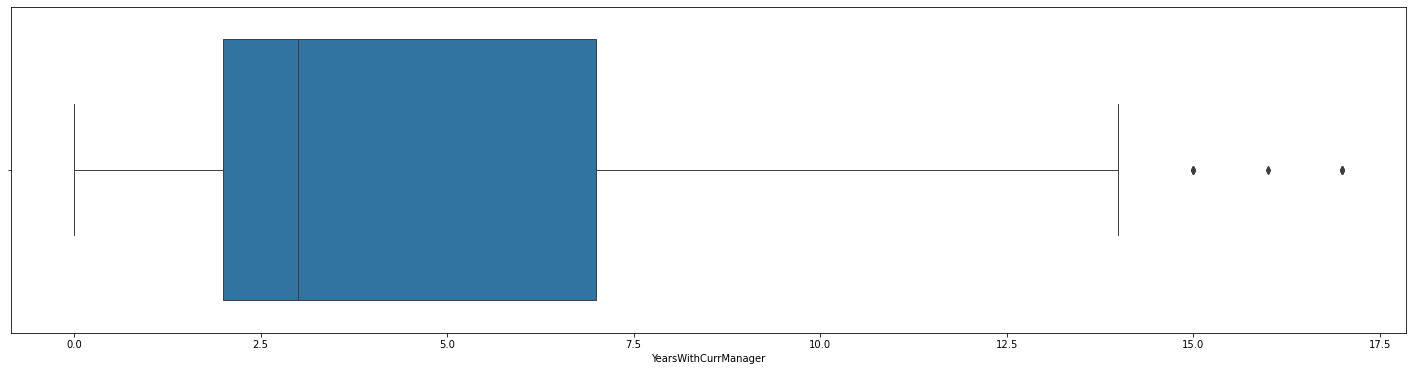

In [ ]:
# Plot more outliers
plot_outlier('TotalWorkingYears')
plot_outlier('TrainingTimesLastYear')
plot_outlier('YearsAtCompany')
plot_outlier('YearsInCurrentRole')
plot_outlier('YearsSinceLastPromotion')
plot_outlier('YearsWithCurrManager')

# Data Wrangling

In [ ]:
#Removing outliers
wa_df.drop(wa_df.index[wa_df['MonthlyIncome'] > 16500], inplace = True)
wa_df.drop(wa_df.index[wa_df['NumCompaniesWorked'] > 8], inplace = True)
wa_df.drop(wa_df.index[wa_df['PerformanceRating'] > 3.5], inplace = True)
wa_df.drop(wa_df.index[wa_df['StockOptionLevel'] > 2], inplace = True)
wa_df.drop(wa_df.index[wa_df['TotalWorkingYears'] > 28], inplace = True)
wa_df.drop(wa_df.index[wa_df['TrainingTimesLastYear'] > 4], inplace = True)
wa_df.drop(wa_df.index[wa_df['TrainingTimesLastYear'] < 1], inplace = True)
wa_df.drop(wa_df.index[wa_df['YearsAtCompany'] > 18], inplace = True)
wa_df.drop(wa_df.index[wa_df['YearsInCurrentRole'] > 14], inplace = True)
wa_df.drop(wa_df.index[wa_df['YearsSinceLastPromotion'] > 7], inplace = True)
wa_df.drop(wa_df.index[wa_df['YearsWithCurrManager'] > 14], inplace = True)

# We now have 0 outliers
print(f'AMOUNT OF OUTLIERS AFTER REMOVAL\n{((wa_df[wa_df.columns ]< (Q1 - 1.5 * IQR)) | (wa_df[wa_df.columns] > (Q3 + 1.5 * IQR))).sum()}')

AMOUNT OF OUTLIERS AFTER REMOVAL
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsIn

In [ ]:
# Visualize data with seaborn pairplot (takes a long time to load)
#sns.pairplot(wa_df)

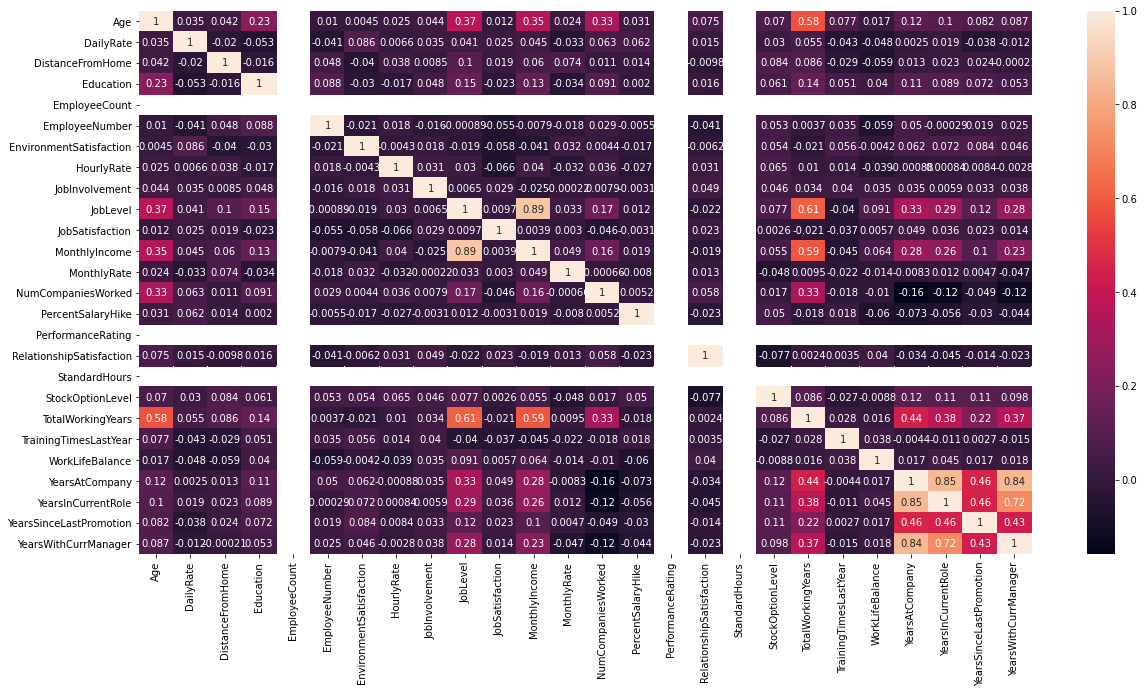

In [ ]:
# Visualize correlation for dataset with seaborn heatmap
plt.figure(figsize=(20,10)) 
corr_matrix = wa_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Feature Engineering / Data processing

In [ ]:
# Data processing
# Print first 5 rows of dataframe
wa_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Y,Yes,12,3,4,80,0,10,3,3,9,5,0,8


In [ ]:
# create list containing categorial columns 
categorical_col = []
for column in wa_df.columns:
    if wa_df[column].dtype == object and len(wa_df[column].unique()) <= 50:
        categorical_col.append(column)

In [ ]:
# create series of codes with index
wa_df['Attrition'] = wa_df.Attrition.astype("category").cat.codes

In [ ]:
# Remove Attrition from the list of categorial columns
categorical_col.remove('Attrition')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder to encode target labels with numerical values between 0 and n 
label = LabelEncoder()
for column in categorical_col:
    wa_df[column] = label.fit_transform(wa_df[column])
    
# Print first 5 rows of dataframe 
wa_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
5,32,0,1,1005,1,2,2,1,1,8,4,1,79,3,1,2,4,2,3068,11864,0,0,0,13,3,3,80,0,8,2,2,7,7,3,6
9,36,0,2,1299,1,27,3,3,1,13,3,1,94,3,2,0,3,1,5237,16577,6,0,0,13,3,2,80,2,17,3,2,7,7,7,7
11,29,0,2,153,1,15,2,1,1,15,4,0,49,2,2,2,3,2,4193,12682,0,0,1,12,3,4,80,0,10,3,3,9,5,0,8


In [ ]:
# Print datatypes for dataframe, which shows that all columns now contain numerical values
wa_df.dtypes

Age                         int64
Attrition                    int8
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

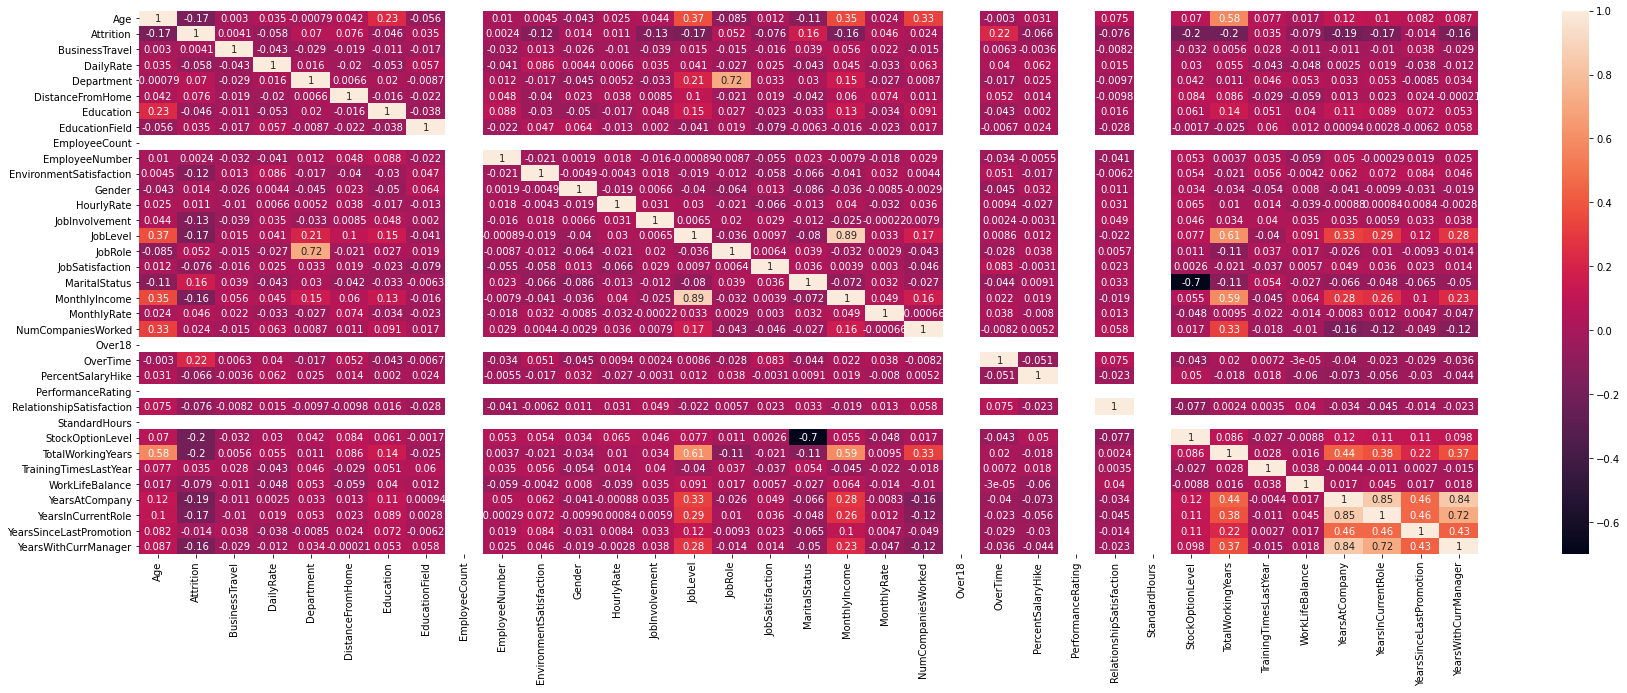

In [ ]:
# Visualize correlation for dataset with seaborn heatmap
plt.figure(figsize=(30,10)) 
corr_matrix = wa_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# this function can be used to print correlated values in order, without perfectly correlated values (1.00...)
def print_corr_values(corr_values, target):
  sorted_mat = corr_values.unstack().sort_values(ascending=False) # get a sorted matrix for correlation values 
  sorted_mat = sorted_mat[sorted_mat != 1.0] # drop 1.00... values
  print(sorted_mat[target]) # print the sorted matrix

print_corr_values(wa_df.corr().abs(), 'Attrition') # print correlated values for Attrition in order

OverTime                    0.222000
StockOptionLevel            0.198342
TotalWorkingYears           0.195474
YearsAtCompany              0.190790
YearsInCurrentRole          0.171889
Age                         0.171781
JobLevel                    0.168421
YearsWithCurrManager        0.164155
MonthlyIncome               0.160598
MaritalStatus               0.156669
JobInvolvement              0.133460
EnvironmentSatisfaction     0.116592
WorkLifeBalance             0.078955
RelationshipSatisfaction    0.076040
JobSatisfaction             0.076020
DistanceFromHome            0.075613
Department                  0.069855
PercentSalaryHike           0.065935
DailyRate                   0.057675
JobRole                     0.051762
Education                   0.045979
MonthlyRate                 0.045583
TrainingTimesLastYear       0.035248
EducationField              0.035236
NumCompaniesWorked          0.023896
Gender                      0.014442
YearsSinceLastPromotion     0.014134
H

#Logistic Regression and variable motivation
Logistic Regression is a supervised learning classification algorithm that is used when the target variable is categorial and is dependent on one or several other variables. An example is: predict wheather an email is spam (1) or not (0). 
We use this algorithm since it's the go-to method for binary classification problems, i.e. problems where there is only two specific outcomes. 

We will use the top 16 correlated values for Attrition with a few exceptions. 
Since we're using Age, we don't need TotalWorkingYears because the two are highly correlated, and provides the same "meaning" for the prediction.
TotalWorkingYears, YearsAtCompany, YearsInCurrentRole and YearsWithCurrManager won't be used since they have a corresponding correlation between them. A person who has worked in the same role is likely to have worked with the same manager for a long time. It's also difficult to give suggestions for improvement regarding these values. This also holds true for JobLevel, WorkLifeBalance and RelationshipSatisfaction.
WorkLifeBalance and RelationshipSatisfaction are also ethically questionable because they give insight in personal components of the employee's life. 

The kept variables are used since they can either provide good insight in common employee "traits" that lead to Attrition, or that the variable can lead to practical recommendations (for example: JobInvolvement is something that be investigated further between the manager and the employee (how they can make sure to satisfy the employees JobInvolvement).


In [ ]:
from sklearn.model_selection import train_test_split
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Defined x and y for the logistic regression model
y = wa_df['Attrition']

# Use dmatrices to create design matrices
y, x = dmatrices('Attrition ~ OverTime + StockOptionLevel + Age + MonthlyIncome + MaritalStatus + JobInvolvement + EnvironmentSatisfaction + JobSatisfaction + DistanceFromHome', wa_df, return_type="dataframe")

# Print columns
print (x.columns)
# make y into contiguous flattened array
y = np.ravel(y)

Index(['Intercept', 'OverTime', 'StockOptionLevel', 'Age', 'MonthlyIncome',
       'MaritalStatus', 'JobInvolvement', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'DistanceFromHome'],
      dtype='object')


In [ ]:
# Initialize LogisticRegression model
model = LogisticRegression(max_iter=1000)
# Define train and test data
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)
# Fit model
model = model.fit(X_train, y_train)
# Check the accuracy on the training set
model.score(x, y)

0.8356867779204108

In [ ]:
# print mean value of y (attrition result)
y.mean()

0.17715019255455713

In [ ]:
# Use model to predict test values
predicted= model.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# predict probability with test values
probs = model.predict_proba(X_test)
print (probs)

[[0.9086212  0.0913788 ]
 [0.86142636 0.13857364]
 [0.87568066 0.12431934]
 [0.90128734 0.09871266]
 [0.57207299 0.42792701]
 [0.88523913 0.11476087]
 [0.71278674 0.28721326]
 [0.95626882 0.04373118]
 [0.71194007 0.28805993]
 [0.75934587 0.24065413]
 [0.92624929 0.07375071]
 [0.84732233 0.15267767]
 [0.83501608 0.16498392]
 [0.65444621 0.34555379]
 [0.91845768 0.08154232]
 [0.83942689 0.16057311]
 [0.86711366 0.13288634]
 [0.83403126 0.16596874]
 [0.76621312 0.23378688]
 [0.95574544 0.04425456]
 [0.78427037 0.21572963]
 [0.9390184  0.0609816 ]
 [0.92869095 0.07130905]
 [0.7583389  0.2416611 ]
 [0.76835724 0.23164276]
 [0.92837336 0.07162664]
 [0.94809477 0.05190523]
 [0.79114804 0.20885196]
 [0.92393316 0.07606684]
 [0.97614652 0.02385348]
 [0.96152288 0.03847712]
 [0.92825406 0.07174594]
 [0.79389779 0.20610221]
 [0.41565952 0.58434048]
 [0.93011972 0.06988028]
 [0.8982642  0.1017358 ]
 [0.43126161 0.56873839]
 [0.96033419 0.03966581]
 [0.96704162 0.03295838]
 [0.94341345 0.05658655]


In [ ]:
# Print model accuracy and Area Under ROC Curve
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8333333333333334
0.8170940170940171


In [ ]:
# Print confusion matrix for the model
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[188   7]
 [ 32   7]]
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.91       195
         1.0       0.50      0.18      0.26        39

    accuracy                           0.83       234
   macro avg       0.68      0.57      0.59       234
weighted avg       0.80      0.83      0.80       234



In [ ]:
# Print X_train
print (X_train)

      Intercept  OverTime  ...  JobSatisfaction  DistanceFromHome
54          1.0       1.0  ...              4.0              23.0
1207        1.0       0.0  ...              2.0              22.0
1187        1.0       0.0  ...              4.0               1.0
639         1.0       0.0  ...              1.0               1.0
684         1.0       0.0  ...              2.0              10.0
...         ...       ...  ...              ...               ...
149         1.0       0.0  ...              2.0               3.0
212         1.0       0.0  ...              3.0              20.0
522         1.0       0.0  ...              4.0              10.0
825         1.0       1.0  ...              4.0               8.0
204         1.0       1.0  ...              1.0              29.0

[545 rows x 10 columns]


In [ ]:
# test the model with some values (test employees)
empl_test = [[1, 1, 2, 33, 3000, 2, 3, 3, 4, 27]]
empl_test_2 = [[0, 0, 2, 45, 4000, 1, 4, 4, 4, 2]]
print(model.predict_proba(empl_test))
print(model.predict_proba(empl_test_2))

[[0.63679939 0.36320061]]
[[0.98780409 0.01219591]]


#Decision tree
The Decision Tree algorithm is used to create a model that can be used to predict classes and values of the target variable by studying simple decision rules from the training data. The algorithm starts at the tree root and belongs to the family of supervised learning algorithms.
We use the decision tree since it can be used for solving regression, as well as classification problems.

In [ ]:
from graphviz import Source 
from sklearn.tree import export_graphviz 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# copy dataframe
dec_tree_df = wa_df.copy()

In [ ]:
# print value counts for attrition
dec_tree_df.Attrition.value_counts()

0    641
1    138
Name: Attrition, dtype: int64

In [ ]:
# This represents y (Attrition)
attrition_data = dec_tree_df.Attrition 
 # This represents X
dtree_df = dec_tree_df[['OverTime', 'StockOptionLevel', 'Age', 'MonthlyIncome', 'MaritalStatus', 'JobInvolvement', 'EnvironmentSatisfaction', 'JobSatisfaction', 'DistanceFromHome']]

dtree_df.info()
dtree_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 2 to 1469
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   OverTime                 779 non-null    int64
 1   StockOptionLevel         779 non-null    int64
 2   Age                      779 non-null    int64
 3   MonthlyIncome            779 non-null    int64
 4   MaritalStatus            779 non-null    int64
 5   JobInvolvement           779 non-null    int64
 6   EnvironmentSatisfaction  779 non-null    int64
 7   JobSatisfaction          779 non-null    int64
 8   DistanceFromHome         779 non-null    int64
dtypes: int64(9)
memory usage: 60.9 KB


,OverTime,StockOptionLevel,Age,MonthlyIncome,MaritalStatus,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,DistanceFromHome
2,1,0,37,2090,2,2,4,3,2
3,1,0,33,2909,1,3,4,3,3
5,0,0,32,3068,2,3,4,4,2
9,0,2,36,5237,1,3,3,3,27
11,1,0,29,4193,2,2,4,3,15
12,0,1,31,2911,0,3,1,3,26
13,0,1,34,2661,0,3,2,4,19
14,1,0,28,2028,2,2,3,3,24
17,1,2,22,2935,0,4,4,4,16
19,1,0,38,3944,2,3,4,4,2


In [ ]:
# Create training and test data with random_state = 42
X_train, X_test, y_train, y_test = train_test_split(dtree_df, attrition_data, test_size=0.3, random_state=42)
print("Our training data has {} rows".format(len(X_train)))
print("Our test data has {} rows".format(len(X_test)))

Our training data has 545 rows
Our test data has 234 rows


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
# Creating DecisionTreeClassifier with 6 as max depth (to see all variables)
classifier = DecisionTreeClassifier(max_depth=6)
# Fit decision tree with training values
classifier.fit(X_train.values, y_train.values)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Predicts y
y_pred = classifier.predict(X_test.values)

In [ ]:
# Creating Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test.values, y_pred)
confusion_matrix

array([[180,  15],
       [ 24,  15]])

In [ ]:
# Classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       195
           1       0.50      0.38      0.43        39

    accuracy                           0.83       234
   macro avg       0.69      0.65      0.67       234
weighted avg       0.82      0.83      0.82       234



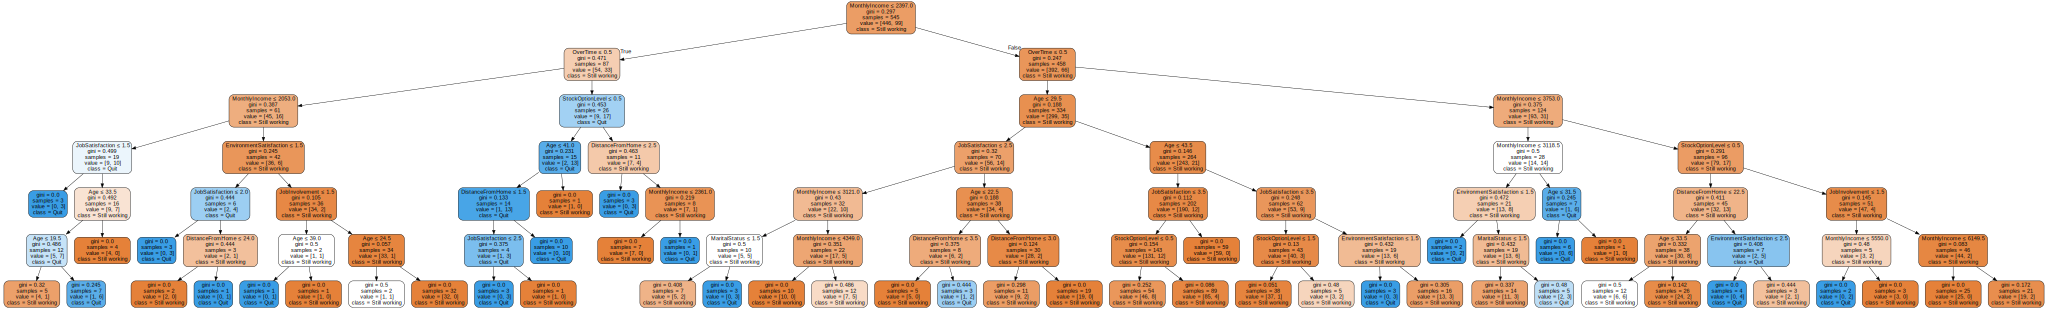

In [ ]:
# plot the tree to visualize how the model "thinks"
tree_plot = Source(tree.export_graphviz(classifier, out_file=None, 
                            feature_names=X_train.columns, class_names=['Still working', 'Quit'], 
                            filled=True, rounded=True, special_characters=True))
tree_plot

In [ ]:
# Get 10 sample employees
ten_sample = X_test.head(10) 
# Predict the sample 
ten_sample['Attrition'] = classifier.predict(ten_sample) 
ten_sample

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,OverTime,StockOptionLevel,Age,MonthlyIncome,MaritalStatus,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,DistanceFromHome,Attrition
1130,0,2,35,3407,1,4,2,3,28,0
1114,0,1,48,2367,1,3,3,1,15,0
1037,1,2,45,9380,1,3,2,4,29,0
1227,0,1,31,3477,1,3,2,3,2,0
931,1,0,30,4695,2,3,3,3,9,0
423,0,0,30,8412,1,3,3,1,22,0
732,0,0,30,2422,2,3,2,2,5,0
1015,0,2,34,2996,0,3,4,1,1,0
474,1,2,24,2725,1,4,2,4,23,0
1108,0,0,35,2450,2,2,4,1,1,0


# RandomForestClassifier
The Random forest algorithm creates an ensemble of decision trees that the model uses for predicting values. The model can often produce very good results without hyper-parameter tuning. 
We use the algortihm since it's a ML algorithm known for its simplicity and diversity. It is simple to implement and it can be used for both classifcation and regression problems. The overall result is also improved since the algorithm uses a combination of learning models.

In [ ]:
# Import libraries for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# This function is inspired by: Fares Sayah on Kaggle (used to print score result from the RandomForestClassifier model)
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
# Fit the RandomForestClassifier with the same X_train and y_train used for the decision tree
rf_clf.fit(X_train, y_train)
# Print scores via the function defined as print_score above
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    446.0  99.0       1.0      545.0         545.0
_______________________________________________
Confusion Matrix: 
 [[446   0]
 [  0  99]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.859729   0.615385  0.846154    0.737557      0.819005
recall       0.974359   0.205128  0.846154    0.589744      0.846154
f1-score     0.913462   0.307692  0.846154    0.610577      0.812500
support    195.000000  39.000000  0.846154  234.000000    234.000000
_______________________________________________
Confusion

**Improvements:** 
Tuning can be done for both Decision tree and Random Forest. For example: Hyperparameter tuning for Random forest can be done with: Randomized Search Cross Validation
(Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try.)
And after this a Grid Search Cross Validation can be done. 


# Lightgbm

In [ ]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

print_score(lgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    446.0  99.0       1.0      545.0         545.0
_______________________________________________
Confusion Matrix: 
 [[446   0]
 [  0  99]]

Test Result:
Accuracy Score: 82.48%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.863208   0.454545  0.824786    0.658877      0.795097
recall       0.938462   0.256410  0.824786    0.597436      0.824786
f1-score     0.899263   0.327869  0.824786    0.613566      0.804031
support    195.000000  39.000000  0.824786  234.000000    234.000000
_______________________________________________
Confusion

#AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize AdaBoostClassifier and fit with training data
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
# Print scores 
print_score(lgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    446.0  99.0       1.0      545.0         545.0
_______________________________________________
Confusion Matrix: 
 [[446   0]
 [  0  99]]

Test Result:
Accuracy Score: 82.48%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.863208   0.454545  0.824786    0.658877      0.795097
recall       0.938462   0.256410  0.824786    0.597436      0.824786
f1-score     0.899263   0.327869  0.824786    0.613566      0.804031
support    195.000000  39.000000  0.824786  234.000000    234.000000
_______________________________________________
Confusion

#XGBoost

In [ ]:
from xgboost import XGBClassifier
# Initialize XGBClassifier and fit with training data
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
# Print scores 
print_score(lgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    446.0  99.0       1.0      545.0         545.0
_______________________________________________
Confusion Matrix: 
 [[446   0]
 [  0  99]]

Test Result:
Accuracy Score: 82.48%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.863208   0.454545  0.824786    0.658877      0.795097
recall       0.938462   0.256410  0.824786    0.597436      0.824786
f1-score     0.899263   0.327869  0.824786    0.613566      0.804031
support    195.000000  39.000000  0.824786  234.000000    234.000000
_______________________________________________
Confusion

#Comparing models

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score

# Function for comparing models (Inspired by Raj Mehrotra on Kaggle)
def compare(model):
    clf=model
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    
    # Calculating various metrics
    acc.append(accuracy_score(pred,y_test))
    prec.append(precision_score(pred,y_test))
    rec.append(recall_score(pred,y_test))
    auroc.append(roc_auc_score(pred,y_test)) 

In [ ]:
# Lists of variable results
acc=[]
prec=[]
rec=[]
auroc=[]
# Define models that will be compared
models = [LogisticRegression(max_iter=1000), DecisionTreeClassifier(max_depth=6), RandomForestClassifier(n_estimators=100), LGBMClassifier(), AdaBoostClassifier(), XGBClassifier()]
model_names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier', 'LGBMClassifier', 'AdaBoostClassifier', 'XGBClassifier']

# Call the compare function for all models via for loop
for model in range(len(models)):
    compare(models[model])
    
# Create dataframe from and print it 
d = {'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df = pd.DataFrame(d)
met_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,LogisticRegression,0.837607,0.128205,0.555556,0.702222
1,DecisionTreeClassifier,0.829060,0.384615,0.483871,0.682822
2,RandomForestClassifier,0.850427,0.205128,0.666667,0.763514
3,LGBMClassifier,0.824786,0.256410,0.454545,0.658877
4,AdaBoostClassifier,0.829060,0.205128,0.470588,0.663866
5,XGBClassifier,0.841880,0.256410,0.555556,0.710648


In [ ]:
# Print scores for the algorithms
print(f'Overall score for LogisticRegression {met_df.iloc[0].values[1:].sum()}')
print(f'Overall score for DecisionTreeClassifier {met_df.iloc[1].values[1:].sum()}')
print(f'Overall score for RandomForestClassifier {met_df.iloc[2].values[1:].sum()}')
print(f'Overall score for LGBMClassifier {met_df.iloc[3].values[1:].sum()}')
print(f'Overall score for AdaBoostClassifier {met_df.iloc[4].values[1:].sum()}')
print(f'Overall score for XGBClassifier {met_df.iloc[5].values[1:].sum()}')

Overall score for LogisticRegression 2.2235897435897436
Overall score for DecisionTreeClassifier 2.3803683647955065
Overall score for RandomForestClassifier 2.485735735735736
Overall score for LGBMClassifier 2.1946185365996684
Overall score for AdaBoostClassifier 2.1686418157006395
Overall score for XGBClassifier 2.364494301994302


In [ ]:
# Function for plotting the incoming models with corresponding variable (metric)
def comp_models(met_df, variable):
    sns.factorplot(data=met_df,x=variable,y='Modelling Algo',size=5,aspect=1.5,kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update

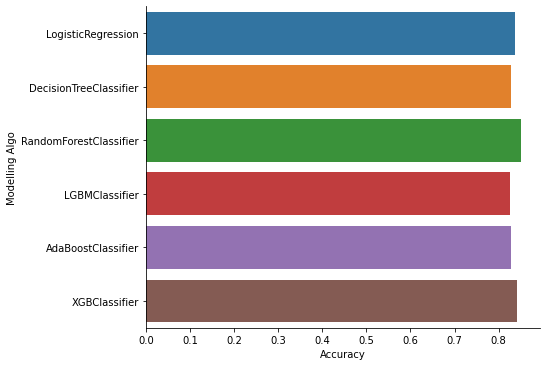

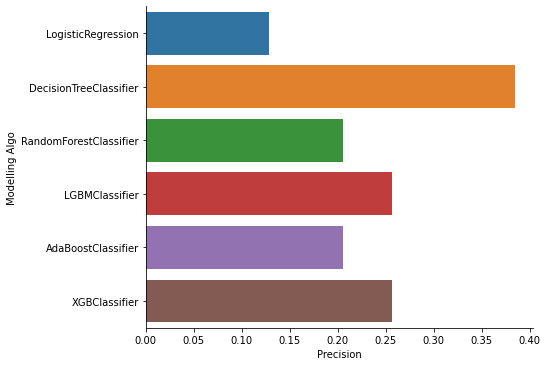

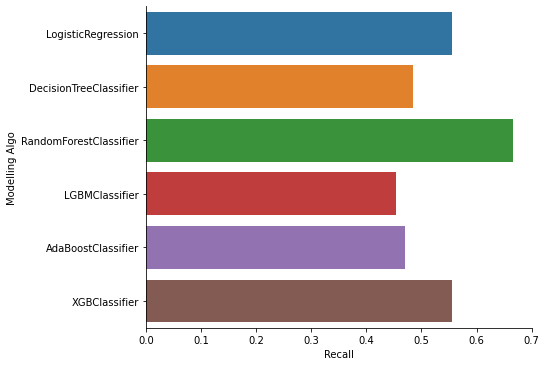

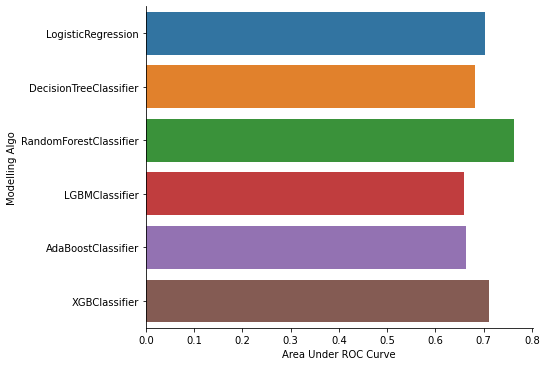

In [ ]:
# Plot comparison of all models with the different variables
comp_models(met_df,'Accuracy')
comp_models(met_df,'Precision')
comp_models(met_df,'Recall')
comp_models(met_df,'Area Under ROC Curve')

#Results

* Best accuracy: RandomForestClassifier.
* Best overall score: RandomForestClassifier.

The most suited algorithm for our choice of variables is RandomForestClassifier. When comparing the models we can see that it has the best accuracy and overall score. The overall result of the algorithm is improved since the algorithm uses a combination of learning models. The metric we believe is most important is Recall, which the algorithm also has the highest score in. Recall can be thought of as the models ability to find all the data points of interest in a dataset, i.e. how well the model predicts correct values based on the actual data. The mathematical definition of Recall is the number of true positives divided by the number of true positives plus the number of false negatives. 

As is demonstrated in the Decision Tree plot, MonthlyIncome has the highest priority, followed by OverTime, StockOptionLevel, Age, JobSatisfaction, EnvironmentSatisfaction, JobInvolvement, DistanceFromHome and MaritalStatus. The variables are chosen so that fitting actions can be recommended for each employee. Logically the MonthlyIncome has a high priority, as well as OverTime, StockOptionLevel and Age. Other variables can be further investigated by the manager or HR. A few examples:

* If an employee is unsatisfied with the Job (JobSatisfaction): then the manager can have a conversation with the employee about this and ask her/him how it can be improved.
* If an employee is unsatisfied with the Environment (EnvironmentSatisfaction): then the employee can be asked how (s)he wants it to be improved.
* If an employee is unsatisfied with the DistanceFromHome: then the employee can be offered free travel cost.